# Markov matrices

The goal of this notebook is to investigate the properties of Markov matrices. The Markov matrix
(or transition matrix) has entries $p_{a \to b}$ corresponding to the probability to have
a transition from $a$ to $b$. The entries are organized as follows (we take $a \in [1,9]$ for
this illustration):

$$
T=
\begin{pmatrix}
p_{1 \to 1} & p_{2\to 1} & \cdots & p_{9 \to 1} \\
p_{1\to 2} & p_{2\to 2} & \cdots & p_{9 \to 2} \\
\vdots  & \vdots  & \ddots & \vdots  \\
p_{1\to 9} & p_{2\to 9} & \cdots & p_{9 \to 9} 
\end{pmatrix}
$$

The elements of the Markov matrix $T$ must satisfy two conditions:

* They are non negative (because they are probabilities)
* The elements of each column sum to one. For example $$\sum_{i=1}^9 p_{1 \to i} =1$$ as the probability of doing something, being on the position 1, is clearly one.


## Evolution and probability conservation

The Markov matrix describes how the probability distribution evolves in time. Suppose the different configurations $a$ are distributed according to probabilities $\pi_a^t$ at time step $t$. This can be
expressed by a vector

$$
\pi^t = \begin{pmatrix} \pi_1^t \\ \pi_2^t \\ \vdots \end{pmatrix}
$$

At the next time step, the probability distribution will be

$$
\pi^{t+1} = T \pi^t
$$

Clearly, if the initial probability distribution is $\pi^0$, then the probability
distribution at time step $t$ is $\pi^t = T^t \pi^0$. It is simple to show that the normalization of the probability distribution is conserved:

$$
\sum_{j=1}^9  \pi_j^{t+1} = \sum_{j,i=1}^9   T_{ji} \pi_i^{t} = \sum_{i=1}^9 \left(\sum_{j=1}^9  T_{ji} \right) \pi_i^t =\sum_{i=1}^9 \pi_i^t=1
$$

Note that having $\sum_{j=1}^9 T_{ji} <1$ would imply a probability loss.

## Markov matrix spectrum
Markov matrices are in general non symmetric (e.g. the matric T for the inhomogeneus pebble game). As a consequence: 
* the eigenvalues can be complex 

* the eigenvectors of $T$ and $T^T$ may be different (eigenvalues are instead  the same as $\text{det}[T-\lambda I]= \text{det}[T^T-\lambda I]$), 

Among the eigenvalues there is for sure the eigenvalue $\lambda =1$:
$$
T^T \begin{pmatrix}
1  \\
1 \\
\vdots   \\
1  
\end{pmatrix}
= \begin{pmatrix}
1  \\
1 \\
\vdots   \\
1  
\end{pmatrix}
$$
Note that the elements of the eigenvector $\begin{pmatrix}
1  \\
1 \\
\vdots   \\
1  
\end{pmatrix}$ are all positve.

### Perron Froebenius Theorem (simpler version)

Let us first discuss the case where the elements of a Markov matrix are all positive (this makes statements simpler). Then the theorem shows that:

1.   The eigenvalue with maximal modulus is positive and non degenerate.
2.   the associated eigenvector is the only one with all entries positive.

There are many consequences:

* $\lambda_1=1$ is then the maximal eigenvalue of $T^T$. It is then maximal for $T$ as well. Moreover, its associated eigenvector, $\pi_1$ is the stationary probability of the Markov chain:

$$T \pi_1 =\pi_1 $$

* All the other eigenvalues have a smaller modulus. In particular, the second largest eignevalue $\lambda_2 =|\lambda_2| e^{i \theta_2}$ plays an important role. Indeed, an arbitrary initial condition $\pi^{t=0}$ can be decomposed on the basis of the eigenvectors of $T$:

$$\pi^{t=0}= \pi_1+ c_2 \pi_2 +c_3 \pi_3+\ldots$$

At the first step of the Markov chain we have

$$\pi^{t=1}= \pi_1+ \lambda_2 c_2 \pi_2 + \lambda_3 c_3 \pi_3+\ldots$$

At the second step of the Markov chain we have

$$\pi^{t=2}= \pi_1+ \lambda_2^2 c_2 \pi_2 + \lambda_3^2 c_3 \pi_3+\ldots$$

After $t$ steps

$$\pi^{t}= \pi_1+ \lambda_2^t c_2 \pi_2 + \lambda_3^t c_3 \pi_3+\ldots  \\ = \pi_1 + |\lambda_2|^t e^{i \theta_2 t} c_2 \pi_2 +\ldots$$

Note that because $|\lambda_2|<1$ the Markov chain converges to the stationary state exponentially fast. If
we write $|\lambda_2|^t = \exp(-t/ \tau)$, we find

$$\tau = -\frac{1}{\ln |\lambda_2|}$$

A Markov chain Monte Carlo is then able to produce an unbiased configuaration after $\tau$ steps. The closer $|\lambda_2|$ is to 1, the slower is the convergence of the algorithm.

### Special cases

If some of the elements of $T$ are zero, the eigenvalue $\lambda_1=1$ is still maximal but it may be degenerate. The associated eigenvector is still a stationary state, but the convergence to that state may be problematic.

#### *Periodic Markov chains*

A Markov chain is **periodic** when $\lambda_2 \ne 1$ but $|\lambda_2| =1$. Consider the following examples. Provide a graphical presentation of the Markov chain. Which one is periodic? 
$$
T_1=
\begin{pmatrix}
0 & 1/2&  0 \\
1 & 0& 1  \\
0 & 1/2 & 0 
\end{pmatrix} \quad 
T_2=
\begin{pmatrix}
0 & 0&  1 \\
1 & 0& 0  \\
0 & 1 & 0 
\end{pmatrix}
 \quad 
T_3=
\begin{pmatrix}
0 & 1/2&  1 \\
1 & 0& 0 \\
0 & 1/2 & 0 
\end{pmatrix}
$$

In order to avoid periodicity it is enough to have  slightly positive
diagonal elements.

#### *Reducible Markov chains*

A Markov chain is **reducible** when $\lambda_1 =1$ is degenerate.  Consider the following examples. Provide a graphical presentation of the Markov chain. Which one is reducible? 

$$
T_1=
\begin{pmatrix}
0 & 1&  0 \\
1 & 0& 0  \\
0 & 0 & 1 
\end{pmatrix} \quad 
T_2=
\begin{pmatrix}
0 & 1&  1/2 \\
1 & 0& 1/2  \\
0 & 0 & 0 
\end{pmatrix}
 \quad 
T_3=
\begin{pmatrix}
0 & 1/2&  1 \\
1 & 0& 0 \\
0 & 1/2 & 0 
\end{pmatrix}
$$

In the following, you will consider simple problems and check whether the probability distribution
eventually becomes stationary, how quickly this happens and under what conditions.

## Markov matrix for the uniform distribution

We will start with the simple example of a uniform distribution
probability over a $3 \times 3$ lattice. The goal is to
construct the Markov matrix in such a way that all cells will be visited with
the same probability.
During the lecture, we have seen that this distribution can be obtained by
choosing transition probabilities that are $1/4$ for every neighbor
of a cell. If the transition goes out of the lattice, one remains on
the cell. In your codes, you can use the following convention to label the
cells in the lattice:

&nbsp;
<center>
<img src="https://gist.github.com/mferrero/ae328ab0e3a0d3d7181a007daf5a373a/raw/cells.png" width=150 height=150 />
</center>

Before anything else, you can execute the lines below. They load the relevant python libraries that will
be useful in all the following. They only need to be executed once.

In [21]:
# Let us import the relevant libraries here so we don't have to think about it
%matplotlib inline
import numpy as np
import itertools as it
import matplotlib.pylab as plt

### Construction of the Markov (transition) matrix

Start by constructing and filling the Markov matrix. Creating a
matrix filled with zeros can be done with this code:
```python
n = 3
dim = n**2
markov = np.zeros([dim,dim])
```
Now add the code to fill the matrix. You can just fill in the elements
by hand. For more challenge, you can try to fill the matrix for a generic
lattice of size $n \times n$.

### Solution

There are many different ways to write the code to fill the Markov matrix.
For a $3 \times 3$ lattice, we can easily write a table of neighbors by
hand and then fill the Markov matrix. Here is a code that does that:

In [22]:
n = 3
dim = n**2
markov = np.zeros([dim,dim])

# manually fill a table of neighbors
# if a neighbor is outside then keep the same index
neighbors = np.zeros([dim, 4], dtype=int)
neighbors[0] = [1,3,0,0]
neighbors[1] = [2,4,0,1]
neighbors[2] = [2,5,1,2]
neighbors[3] = [4,6,3,0]
neighbors[4] = [5,7,3,1]
neighbors[5] = [5,8,4,2]
neighbors[6] = [7,6,6,3]
neighbors[7] = [8,7,6,4]
neighbors[8] = [8,8,7,5]

# fill the matrix
for k in range(dim):
    for i in range(4):
        markov[neighbors[k, i], k] += 0.25
    
print(markov)

[[0.5  0.25 0.   0.25 0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.   0.25 0.   0.   0.   0.  ]
 [0.   0.25 0.5  0.   0.   0.25 0.   0.   0.  ]
 [0.25 0.   0.   0.25 0.25 0.   0.25 0.   0.  ]
 [0.   0.25 0.   0.25 0.   0.25 0.   0.25 0.  ]
 [0.   0.   0.25 0.   0.25 0.25 0.   0.   0.25]
 [0.   0.   0.   0.25 0.   0.   0.5  0.25 0.  ]
 [0.   0.   0.   0.   0.25 0.   0.25 0.25 0.25]
 [0.   0.   0.   0.   0.   0.25 0.   0.25 0.5 ]]


You can also write a code that would be general for $n \times n$
matrices. Again, there are many ways to do it. Here is one that uses
a couple of nice functions in `numpy`. Maybe one can find a
shorter code. Let me know!

In [23]:
n = 3
dim = n**2
markov = np.zeros([dim,dim])

# loop over all cells (linear index)
for k in range(dim):
    pair = np.array(np.unravel_index(k, [n,n]))                 # get index pair from linear index
    for shift in [(-1,0), (1,0), (0,-1), (0,1)]:                # all neighbors
        new_pair = pair + shift                                 # new index pair
        kp = np.ravel_multi_index(new_pair, [n,n], mode='clip') # new clipped linear index
        markov[kp, k] += 0.25
        
print(markov)

[[0.5  0.25 0.   0.25 0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.   0.25 0.   0.   0.   0.  ]
 [0.   0.25 0.5  0.   0.   0.25 0.   0.   0.  ]
 [0.25 0.   0.   0.25 0.25 0.   0.25 0.   0.  ]
 [0.   0.25 0.   0.25 0.   0.25 0.   0.25 0.  ]
 [0.   0.   0.25 0.   0.25 0.25 0.   0.   0.25]
 [0.   0.   0.   0.25 0.   0.   0.5  0.25 0.  ]
 [0.   0.   0.   0.   0.25 0.   0.25 0.25 0.25]
 [0.   0.   0.   0.   0.   0.25 0.   0.25 0.5 ]]


### Basic properties (Perron-Frobenius theorem) of the Markov matrix

Check that the matrix satisfies the following criteria:

   * The sum over the elements in a column is 1.
   * There is at least one eigenvalue equal to 1.
   * The corresponding eigenvector can be chosen to have only real positive elements.
   
Hint: You can find the eigenvalues and eigenvectors of a matrix with
```python
eigvals, eigvects = np.linalg.eig(markov)
```
The columns of `eigvects` are the eigenvectors. They are sorted in the
same order as the eigenvalues in `eigvals`.

### Solution

In [24]:
# all elements should be 1
print(np.sum(markov, axis=0))

# get eigenvalues and eigenvectors
eigvals, eigvects = np.linalg.eig(markov)

# there should be a 1 in the array
print("eigenvalues:", np.sort(eigvals)[::-1])

# this is the index of the eigenvalue 1 (you may have to adjust this manually)
#index = 1

# this code will find the index automatically
indices = np.where(np.isclose(eigvals, 1, 1e-10))[0]
assert(len(indices) == 1) #just a sanity check
index = indices[0] #in this case we knew that the eigenvalue 1 isn't degenerate, in general we can't just assume it.

# the column of the eigenvector for 1 should have real elements of the same sign
# I multiply the eigenvector by -1 to make it clear that all elements are positive
print("eigenvector of eigenvalue 1:",-eigvects[:, index]) # right eigenvector relative to 1 is the stationary distribution

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
eigenvalues: [ 1.00000000e+00  7.50000000e-01  7.50000000e-01  5.00000000e-01
  2.50000000e-01  2.50000000e-01 -5.30310388e-17 -6.48486233e-17
 -5.00000000e-01]
eigenvector of eigenvalue 1: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333]


### Evolution of the probability distribution

Let us now see how the probability distribution evolves. Start by
generating a random initial normalized probability distribution.
You can do this with this code:
```python
prob = np.random.rand(dim)
prob /= np.sum(prob)
```
Now apply the Markov matrix to this probability distrubtion several times and see how
it evolves. Acting with a matrix on a vector can be done simply with
`np.dot(markov, prob)`. For the python afficionados, you can represent the vector of
probabilities as a $3 \times 3$ colormap for a better visualization.

### Solution

As you will see from the code below, it is apparent that the evolution goes to a uniform one
over the $3 \times 3$ lattice. This confirms that we have constructed the Markov matrix correctly.

Initial vector: [0.12270819 0.16179048 0.15398138 0.18238694 0.06863521 0.01850297
 0.13687293 0.14395932 0.01116256]
After Markov:  [0.11178658 0.11135607 0.11092476 0.11154289 0.11111058 0.11067987
 0.11129839 0.11086668 0.11043418]


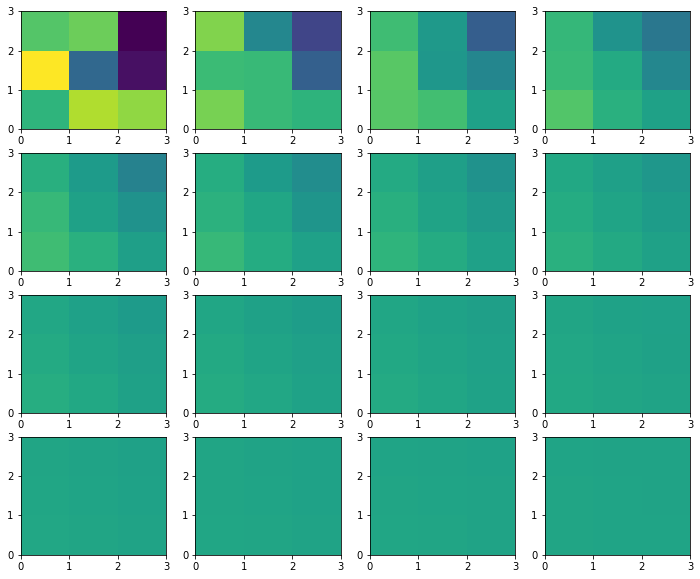

In [25]:
prob = np.random.rand(dim) # create an array with uniformm random entries in [0,1]
prob /= np.sum(prob) # normalize the vector
minp, maxp = np.min(prob), np.max(prob)
print("Initial vector:", prob)

k = 4
fig, ax = plt.subplots(k, k, figsize=(12,10))

# let the probability evolve
for i in range(k**2):
    ax[i//k, i%k].pcolormesh(prob.reshape(n,n), vmin=minp, vmax=maxp)
    prob = np.dot(markov, prob) # apply the Markov matrix on the vector
    
print("After Markov: ", prob)

### Non ergodic case

The Markov matrix above is ergodic. Out of curiosity, let us see what happens if
we are dealing with a non-ergodic matrix. To do that, let us investigate a Markov matrix
with the same rules as above but with the difference that if a transition between
the first row and the second row is found, one remains on the same cell. This
effectively disconnects the first row from the others:

   * Construct this new Markov matrix and check the normalization of the columns.
   * What can you say about the eigenvalue spectrum in this case?
   * Let a randomly chosen initial proability distribution evolve with the
     Markov matrix.
   * What happens in this case?
   * Can you anticipate what will be the final stationary probability distribution
     from the inital one?

### Solution

The construction of the matrix is very similar but some processes are forbidden.
Again I tried to write something general here but it is perfectly fine to
manually write a table of neighbors.

In [26]:
n = 3
dim = n**2
markov = np.zeros([dim,dim])

# loop over all cells (linear index)
for k in range(dim):
    
    pair = np.array(np.unravel_index(k, [n,n]))
    neighbors = [(-1,0), (1,0), (0,-1), (0,1)]
    
    # eliminate some processes for the first and second line
    if k < n: neighbors[1] = (0,0)
    elif k < 2*n: neighbors[0] = (0,0)
        
    for shift in neighbors:
        new_pair = pair + shift
        kp = np.ravel_multi_index(new_pair, [n,n], mode='clip')
        markov[kp, k] += 0.25
        
print(markov)
print(np.sum(markov, axis=0))

[[0.75 0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.5  0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.75 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.25 0.   0.25 0.   0.  ]
 [0.   0.   0.   0.25 0.25 0.25 0.   0.25 0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.   0.   0.25]
 [0.   0.   0.   0.25 0.   0.   0.5  0.25 0.  ]
 [0.   0.   0.   0.   0.25 0.   0.25 0.25 0.25]
 [0.   0.   0.   0.   0.   0.25 0.   0.25 0.5 ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


The eigenvalue spectrum is special in this non-ergodic case. There are two eigenvalues that are equal to 1.
This means that there is not a unique leading eigenvector. It is clear that in this example, the Markov matrix is **reducible**.

In [27]:
eigvals, eigvects = np.linalg.eig(markov)
print(eigvals)

[ 0.25  0.75  1.   -0.25  1.    0.75  0.25  0.5   0.25]


As a result of the non-ergodicity, the evolution of the probability distribution does not lead to the expected
stationary uniform distribution. Instead, the first row and the other rows live independent lives. Both
end up with a uniform distribution that is just the average of the initial
probabilities within the first row and within the other rows.

Initial vector: [0.17142646 0.16618985 0.16749457 0.1714983  0.03338198 0.12266993
 0.02893787 0.05575245 0.08264861]
After Markov:  [0.16838999 0.16837029 0.16835059 0.0824697  0.08248193 0.08249416
 0.08246888 0.08248111 0.08249335]


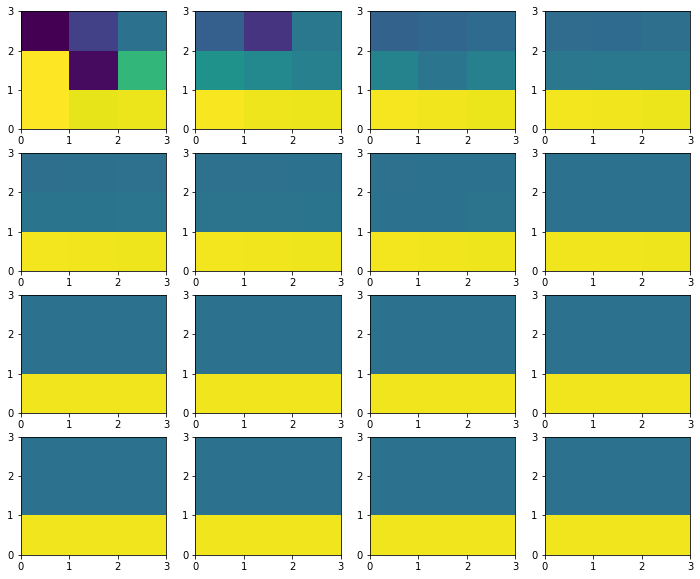

In [28]:
prob = np.random.rand(dim)
prob /= np.sum(prob)
minp, maxp = np.min(prob), np.max(prob)
print("Initial vector:", prob)

k = 4
fig, ax = plt.subplots(k, k, figsize=(12,10))

for i in range(k**2):
    ax[i//k, i%k].pcolormesh(prob.reshape(n,n), vmin=minp, vmax=maxp)
    prob = np.dot(markov, prob)

print("After Markov: ", prob)

## Markov matrix for a non-uniform distribution: Metropolis algorithm

We now want to construct a Markov matrix that leads to a predefined non-uniform
distribution of probabilities $\pi(a)$ for the cells of the $3 \times 3$ lattice. For concreteness,
let us consider the special case where the probability for even cells is
$1/13$ and that of odd cells is twice as large $2/13$. This probability is
clearly normalized: $5 \times (1/13) + 4 \times (2/13) = 1$.

In order to construct the matrix, we use the detailed balance condition

\begin{equation}
\pi(a) \, p_{a\to b} = \pi(b) \, p_{b\to a}
\end{equation}

The Metropolis algorithm gives a recipe for $p_{a \to b}$ that automatically
satisfies the detailed balance above

$$
p_{a \to b} = \alpha \times \mathrm{min} \big[ 1, \frac{\pi(b)}{\pi(a)} \big]
\qquad \text{with} \qquad
\sum_x p_{a \to x} = 1
$$

This expression is valid for neighboring $a \ne b$. Unlike the previous uniform
case, the probability to remain in the same cell is obtained via the
normalization, i.e.

$$
p_{a \to a} = 1 - \sum_{x \ne a} p_{a \to x}
$$

The parameter $\alpha$ can be chosen at will as long as it still allows to
define probabilities $p_{a \to b} > 0$. You can check that this is the
case as long as $0 < \alpha \le 1/4$. In the following, you can consider
the case $\alpha = 1/4$ which leads to a more rapid exploration of the
cells.

### Construction of the Markov (transition) matrix

Follow the same steps as above for this new non-uniform case:

   * Construct the Markov matrix with the Metropolis recipe and check the normalization of the columns.
   * Let a randomly chosen initial proability distribution evolve with the
     Markov matrix.
   * Do you obtain the expected result?

### Solution

As a remark, we recognize the special case when all the $\pi(x)$ are
equal (uniform). In that case the probability transition is always $1/4$ and we are back to
the previous exercise.

In [29]:
# weight for even and odd cells
def weight(x):
    return 1/13 if x%2 == 0 else 2/13

n = 3
dim = n**2
alpha = 0.25
markov = np.zeros([dim,dim])

# loop over all cells (linear index)
for k in range(dim):
    pair = np.array(np.unravel_index(k, [n,n]))
    for shift in [(-1,0), (1,0), (0,-1), (0,1)]:
        new_pair = pair + shift
        try:
            # we found a valid neighbor
            kp = np.ravel_multi_index(new_pair, [n,n])
            markov[kp, k] += alpha * min(1, weight(kp) / weight(k))
        except: pass
        
# take care of diagonal processes
markov += np.diag(1 - np.sum(markov, axis=0))

print(markov)
print(np.sum(markov, axis=0))

[[0.5   0.125 0.    0.125 0.    0.    0.    0.    0.   ]
 [0.25  0.625 0.25  0.    0.25  0.    0.    0.    0.   ]
 [0.    0.125 0.5   0.    0.    0.125 0.    0.    0.   ]
 [0.25  0.    0.    0.625 0.25  0.    0.25  0.    0.   ]
 [0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.   ]
 [0.    0.    0.25  0.    0.25  0.625 0.    0.    0.25 ]
 [0.    0.    0.    0.125 0.    0.    0.5   0.125 0.   ]
 [0.    0.    0.    0.    0.25  0.    0.25  0.625 0.25 ]
 [0.    0.    0.    0.    0.    0.125 0.    0.125 0.5  ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


The evolution of the initial probability distribution goes to the expected checkerboar pattern.

Initial vector: [0.08974783 0.13226285 0.18643473 0.12864927 0.02698594 0.01115488
 0.18836994 0.12606864 0.11032591]
After Markov:  [0.0773881  0.1537139  0.07634225 0.15517129 0.07692308 0.15248889
 0.07750523 0.15401054 0.07645673]


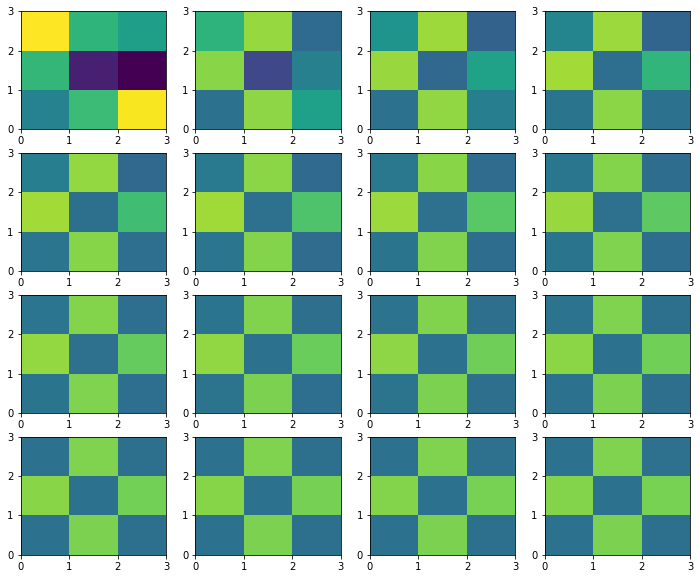

In [30]:
prob = np.random.rand(dim)
prob /= np.sum(prob)
minp, maxp = np.min(prob), np.max(prob)
print("Initial vector:", prob)

k = 4
fig, ax = plt.subplots(k, k, figsize=(12,10))

for i in range(k**2):
    ax[i//k, i%k].pcolormesh(prob.reshape(n,n), vmin=minp, vmax=maxp)
    prob = np.dot(markov, prob)

print("After Markov: ", prob)

### Eigenvalues of the Markov matrix

If you were only given the Markov matrix, would there be a simple way to find the
stationary distribution without having to apply the Markov matrix many times?
Investigate the eigenvalue spectrum and the corresponding eigenvectors. What can you say?

### Solution

The stationary distribution is nothing but the leading eigenvector, corresponding to the eigenvalue 1. Therefore one can find the stationary probabilities by normalizing the eigenvector related
to the eigenvalue 1. Note that the leading eigenvector is unique in this case.

In [31]:
eigvals, eigvects = np.linalg.eig(markov)
print(eigvals)

# find the index of the 1 eigenvalue
indices = np.where(np.isclose(eigvals, 1, 1e-10))[0]
assert(len(indices) == 1)
index = indices[0]

leading = eigvects[:, index]
leading /= np.sum(leading)
print(leading)

[-0.1951941  1.         0.5        0.3201941  0.8201941  0.8201941
  0.625      0.3048059  0.3048059]
[0.07692308 0.15384615 0.07692308 0.15384615 0.07692308 0.15384615
 0.07692308 0.15384615 0.07692308]


### Convergence to the stationary distribution

Above, we have show that the convergence to the stationary distribution
is controlled by the modulus of the second largest eigenvalue $\lambda_2$.
Start from an initial random guess $\pi^{t=0}$ and show how it converges
to the stationary distribution $\pi_1$ by plotting the distance
$| \pi^t - \pi_1 |$ as a function of $t$. To observe the exponential
convergence, you may want to use a semilog plot:
```python
plt.semilogy(dist, '-o')
```
where `dist` is an array. You can get the norm of a vector `v`
with `np.linalg.norm(v)`.

### Solution

Text(0, 0.5, 'Distance')

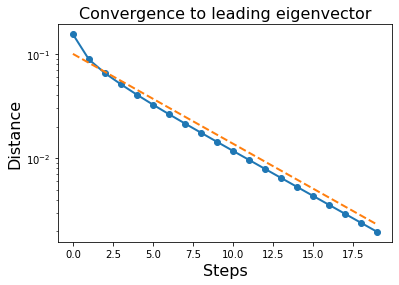

In [32]:
prob = np.random.rand(dim)
prob /= np.sum(prob)

second = np.sort(eigvals)[-2] # this is the second largest eigenvalue

# fill the array dist with the distances to the leading eigenvector
steps = 20
dist = np.zeros(steps)
for i in range(steps):
    dist[i] = np.linalg.norm(prob - leading)
    prob = np.dot(markov, prob)

# create the plot
plt.semilogy(dist, '-o', lw=2)
plt.semilogy(0.1*np.power(second, np.arange(steps)), '--', lw=2)
plt.title("Convergence to leading eigenvector", fontsize=16)
plt.xlabel("Steps", fontsize=16)
plt.ylabel("Distance", fontsize=16)

Hence, we see that the converges really goes like: $e^{-|\lambda_2|t}$